# Algoritmo de Newton

### Función de prueba

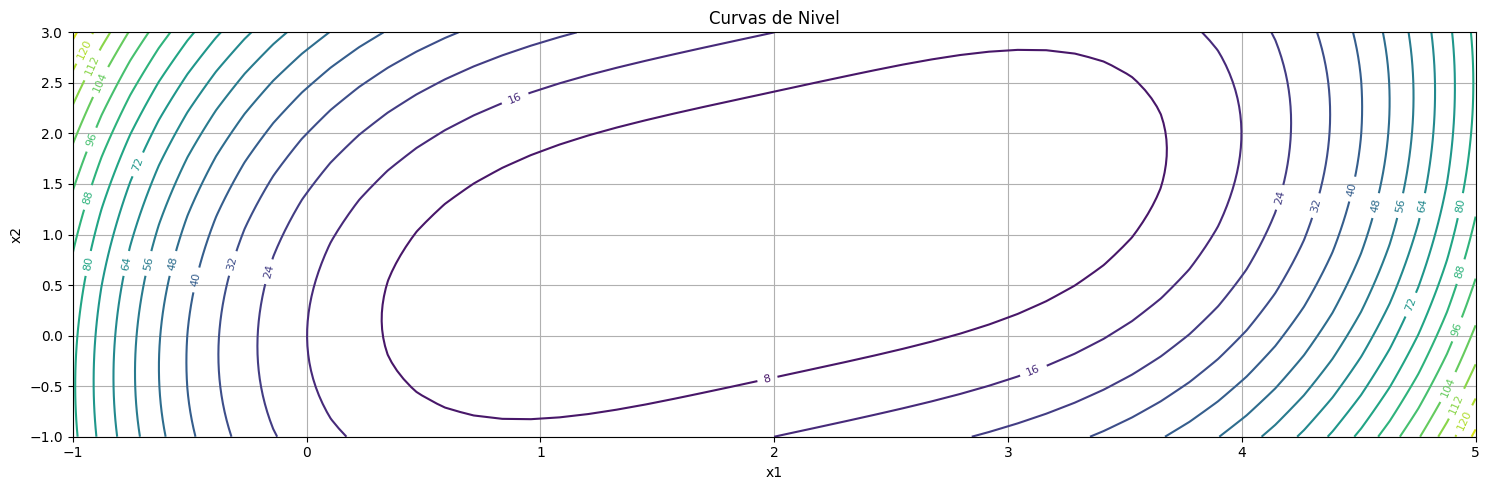

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def quasiconvex_function(x):
  """
  Función de dos variables: f(x1, x2) = (x1 - 2)^4 + (x1 - 2*x2)^2
  Para graficar, usaremos x1 = x y x2 = 0 como caso particular
  """
  if isinstance(x, (list, tuple, np.ndarray)) and len(x) == 2:
    x1, x2 = x
    return (x1 - 2)**4 + (x1 - 2*x2)**2
  else:
    # Para compatibilidad con el código existente, asumimos x2 = 0
    x1 = x
    x2 = 0
    return (x1 - 2)**4 + (x1 - 2*x2)**2

# Crear gráfica 3D de la función de dos variables
fig = plt.figure(figsize=(15, 5))

# Subplot 2: Curvas de nivel
ax2 = fig.add_subplot(111)
x1_range = np.linspace(-1, 5, 50)
x2_range = np.linspace(-1, 3, 50)
X1, X2 = np.meshgrid(x1_range, x2_range)
Z = (X1 - 2)**4 + (X1 - 2*X2)**2

contour = ax2.contour(X1, X2, Z, levels=20)
ax2.clabel(contour, inline=True, fontsize=8)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_title('Curvas de Nivel')
ax2.grid(True)

plt.tight_layout()
plt.show()


### Desarrollo del algoritmo

In [2]:
def gradient(x, h=1e-8):
    """Calcula el gradiente usando diferencias finitas centrales"""
    x1, x2 = x
    
    # Diferencia finita para x1
    df_dx1 = (quasiconvex_function([x1 + h, x2]) - quasiconvex_function([x1 - h, x2])) / (2 * h)
    
    # Diferencia finita para x2
    df_dx2 = (quasiconvex_function([x1, x2 + h]) - quasiconvex_function([x1, x2 - h])) / (2 * h)
    
    return np.array([df_dx1, df_dx2])

def hessian(x, h=1e-5):
    """Calcula la matriz Hessiana usando diferencias finitas"""
    x1, x2 = x
    
    # Segundas derivadas parciales
    # d2f/dx1^2
    d2f_dx1_dx1 = (quasiconvex_function([x1 + h, x2]) - 2*quasiconvex_function([x1, x2]) + quasiconvex_function([x1 - h, x2])) / (h**2)
    
    # d2f/dx2^2
    d2f_dx2_dx2 = (quasiconvex_function([x1, x2 + h]) - 2*quasiconvex_function([x1, x2]) + quasiconvex_function([x1, x2 - h])) / (h**2)
    
    # d2f/dx1dx2 (derivada mixta)
    d2f_dx1_dx2 = (quasiconvex_function([x1 + h, x2 + h]) - quasiconvex_function([x1 + h, x2 - h]) - 
                    quasiconvex_function([x1 - h, x2 + h]) + quasiconvex_function([x1 - h, x2 - h])) / (4 * h**2)
    
    return np.array([[d2f_dx1_dx1, d2f_dx1_dx2],
                    [d2f_dx1_dx2, d2f_dx2_dx2]])

def newton_multivariate_with_trajectory(grad_f, hess_f, x0, tol=1e-6, max_iter=100):
  """Método de Newton multivariado"""
  x = np.array(x0, dtype=float)
  k = 0
  trajectory = [x.copy()]  # Guardar trayectoria

  print("Iter |     x1      x2    |   ||grad||   |  step_norm  |  status")
  print("-------------------------------------------------------------")
  
  while k < max_iter:
    g = grad_f(x)
    H = hess_f(x)
    grad_norm = np.linalg.norm(g)
    status = 'normal'

    # Comprobar convergencia por gradiente
    if grad_norm < tol:
      print("Convergencia alcanzada: gradiente pequeño (||grad|| < tol)")
      return x, np.array(trajectory)

    # Comprobar si Hessiana es singular o mal condicionada
    try:
      # Intentar factorización/LU o inversión directa
      step = -np.linalg.solve(H, g)
    except np.linalg.LinAlgError:
      print("Hessiana singular o mal condicionada, no se puede realizar el paso de Newton, regularice o use otro método.")

    step_norm = np.linalg.norm(step)
    x = x + step
    trajectory.append(x.copy())  # Guardar nuevo punto

    print(f"{k:4d} | {x[0]:9.6f} {x[1]:9.6f} | {grad_norm:11.6e} | {step_norm:10.3e} | {status}")

    if step_norm < tol:
      print("Convergencia alcanzada: paso pequeño (||p|| < tol)")
      return x, np.array(trajectory)

    k += 1

  print(f"FALLO: No convergió tras {max_iter} iteraciones. Última ||grad|| = {grad_norm:.3e}")
  return x, np.array(trajectory)


# Ejecutar Newton multivariado usando la función definida arriba
x0 = [0.0, 3.0]
print("=== MÉTODO DE NEWTON MULTIVARIADO ===")
print("Función: f(x1,x2) = (x1-2)^4 + (x1-2x2)^2")
print("Punto crítico teórico: (2, 1)")

x_star, newton_trajectory = newton_multivariate_with_trajectory(gradient, hessian, x0)

print()
print("=== RESULTADOS ===")
print(f"Solución aproximada: x* = {x_star}")
print(f"Error respecto al punto teórico: ||x* - [2,1]|| = {np.linalg.norm(x_star - np.array([2.0,1.0])):.8e}")
print(f"Valor de la función en x*: f(x*) = {quasiconvex_function(x_star):.8f}")

=== MÉTODO DE NEWTON MULTIVARIADO ===
Función: f(x1,x2) = (x1-2)^4 + (x1-2x2)^2
Punto crítico teórico: (2, 1)
Iter |     x1      x2    |   ||grad||   |  step_norm  |  status
-------------------------------------------------------------
   0 |  0.666664  0.333309 | 5.011986e+01 |  2.749e+00 | normal
   1 |  1.111109  0.555555 | 9.481442e+00 |  4.969e-01 | normal
   2 |  1.407406  0.703703 | 2.809349e+00 |  3.313e-01 | normal
   3 |  1.604937  0.802469 | 8.323994e-01 |  2.208e-01 | normal
   4 |  1.736625  0.868312 | 2.466369e-01 |  1.472e-01 | normal
   5 |  1.824417  0.912208 | 7.307759e-02 |  9.815e-02 | normal
   6 |  1.882944  0.941472 | 2.165262e-02 |  6.544e-02 | normal
   7 |  1.921963  0.960981 | 6.415591e-03 |  4.362e-02 | normal
   8 |  1.947975  0.973988 | 1.900916e-03 |  2.908e-02 | normal
   9 |  1.965317  0.982658 | 5.632344e-04 |  1.939e-02 | normal
  10 |  1.976878  0.988439 | 1.668843e-04 |  1.293e-02 | normal
  11 |  1.984585  0.992293 | 4.944719e-05 |  8.617e-03 | nor

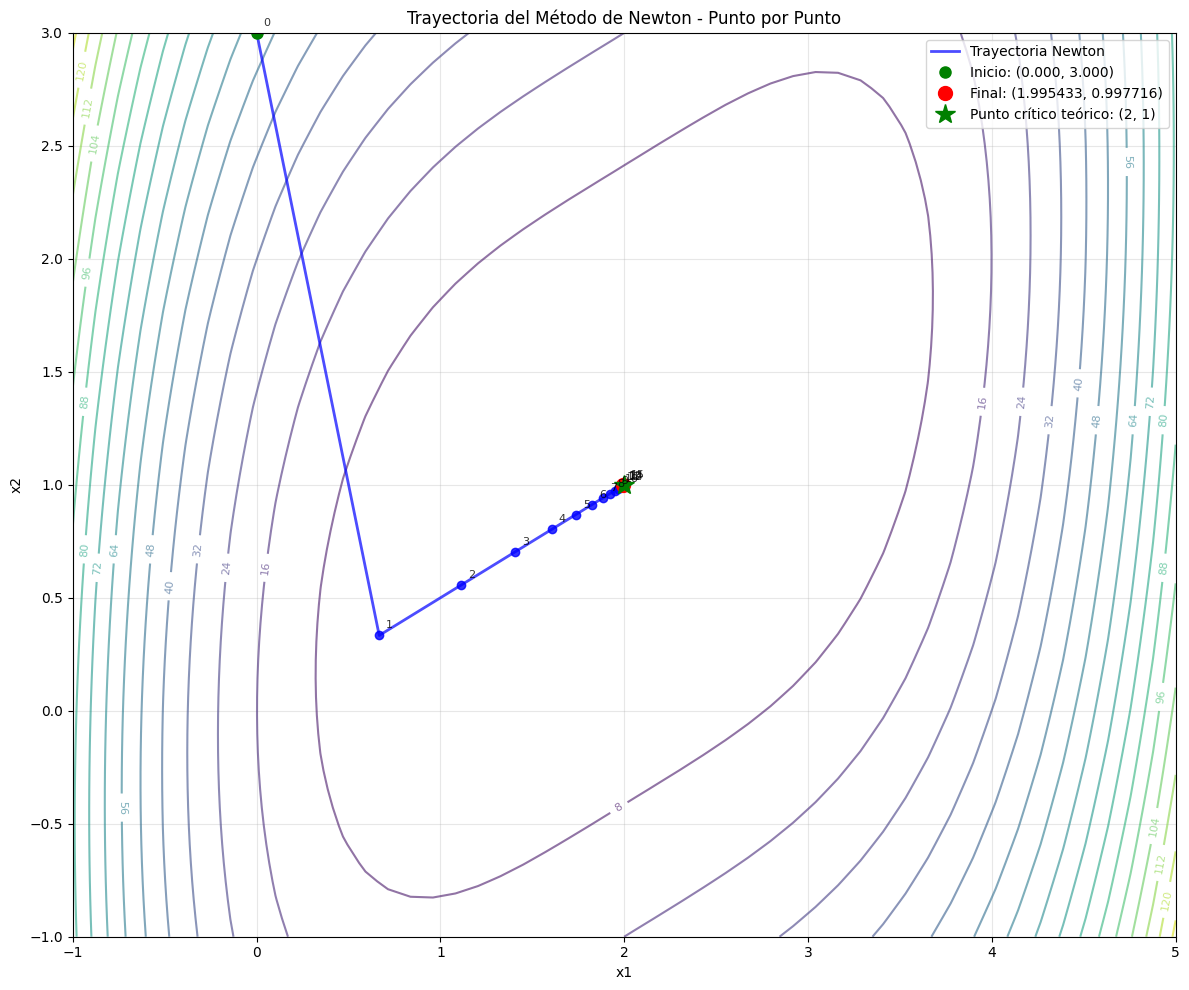


=== TRAYECTORIA DETALLADA ===
Iter |     x1      |     x2      |   f(x)      |  ||x-x*||
-----------------------------------------------------------
   0 |    0.000000 |    3.000000 |   52.000000 | 2.828427e+00
   1 |    0.666664 |    0.333309 |    3.160518 | 1.490725e+00
   2 |    1.111109 |    0.555555 |    0.624301 | 9.938104e-01
   3 |    1.407406 |    0.703703 |    0.123319 | 6.625403e-01
   4 |    1.604937 |    0.802469 |    0.024359 | 4.416935e-01
   5 |    1.736625 |    0.868312 |    0.004812 | 2.944623e-01
   6 |    1.824417 |    0.912208 |    0.000950 | 1.963082e-01
   7 |    1.882944 |    0.941472 |    0.000188 | 1.308721e-01
   8 |    1.921963 |    0.960981 |    0.000037 | 8.724810e-02
   9 |    1.947975 |    0.973988 |    0.000007 | 5.816540e-02
  10 |    1.965317 |    0.982658 |    0.000001 | 3.877693e-02
  11 |    1.976878 |    0.988439 |    0.000000 | 2.585129e-02
  12 |    1.984585 |    0.992293 |    0.000000 | 1.723419e-02
  13 |    1.989724 |    0.994862 |    0.0000

In [3]:
# Crear una nueva figura para mostrar la solución punto por punto
plt.figure(figsize=(12, 10))

# Recrear las curvas de nivel
contour = plt.contour(X1, X2, Z, levels=20, alpha=0.6)
plt.clabel(contour, inline=True, fontsize=8)

# Plotear la trayectoria completa
plt.plot(newton_trajectory[:, 0], newton_trajectory[:, 1], 'b-', alpha=0.7, linewidth=2, label='Trayectoria Newton')

# Plotear cada punto de la trayectoria numerado
for i, point in enumerate(newton_trajectory):
    if i == 0:
        plt.plot(point[0], point[1], 'go', markersize=8, label=f'Inicio: ({point[0]:.3f}, {point[1]:.3f})')
    elif i == len(newton_trajectory) - 1:
        plt.plot(point[0], point[1], 'ro', markersize=10, label=f'Final: ({point[0]:.6f}, {point[1]:.6f})')
    else:
        plt.plot(point[0], point[1], 'bo', markersize=6, alpha=0.8)
    
    # Añadir número de iteración cerca del punto
    plt.annotate(f'{i}', (point[0], point[1]), xytext=(5, 5), 
                textcoords='offset points', fontsize=8, alpha=0.8)

# Agregar el punto teórico
plt.plot(2, 1, 'g*', markersize=15, label='Punto crítico teórico: (2, 1)')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Trayectoria del Método de Newton - Punto por Punto')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Mostrar información detallada de la trayectoria
print("\n=== TRAYECTORIA DETALLADA ===")
print("Iter |     x1      |     x2      |   f(x)      |  ||x-x*||")
print("-----------------------------------------------------------")
for i, point in enumerate(newton_trajectory):
    f_val = quasiconvex_function(point)
    dist_to_optimum = np.linalg.norm(point - np.array([2.0, 1.0]))
    print(f"{i:4d} | {point[0]:11.6f} | {point[1]:11.6f} | {f_val:11.6f} | {dist_to_optimum:9.6e}")

print(f"\nTotal de iteraciones: {len(newton_trajectory) - 1}")
print(f"Solución encontrada: ({x_star[0]:.6f}, {x_star[1]:.6f})")
print(f"Punto crítico teórico: (2, 1)")
print(f"Error final: {np.linalg.norm(x_star - np.array([2.0, 1.0])):.8e}")